In [ ]:
!pip install --upgrade openai


APIRemovedInV1: 

You tried to access openai.ChatCompletion, but this is no longer supported in openai>=1.0.0 - see the README at https://github.com/openai/openai-python for the API.

You can run `openai migrate` to automatically upgrade your codebase to use the 1.0.0 interface. 

Alternatively, you can pin your installation to the old version, e.g. `pip install openai==0.28`

A detailed migration guide is available here: https://github.com/openai/openai-python/discussions/742


In [ ]:
from openai import OpenAI

# Inicializar el cliente de OpenAI con la clave API
client = OpenAI(api_key="")

# Definir una función para procesar una consulta con contexto
def process_query_with_context(user_query, context):
    # Formar el prompt con el contexto y la consulta del usuario
    prompt = f"{context}\n**Usuario:** {user_query}"

    # Realizar la solicitud de completación al modelo de OpenAI
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=1,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    # Retornar el contenido de la respuesta generada por el modelo
    return response.choices[0].message.content  # Changed to dot notation

# Ejemplo de uso
user_query = "cuánto vale b?"
context = "La fecha de hoy es 2024-07-02. b vale 9."

# Procesar la consulta con el contexto proporcionado
respuesta = process_query_with_context(user_query, context)

# Imprimir la respuesta generada por el modelo
print(respuesta)

Ya has mencionado que \( b \) vale 9. Entonces, \( b = 9 \).


In [ ]:
from openai import OpenAI

# Inicializar el cliente de OpenAI con la clave API
client = OpenAI(api_key="")

# Definir una función para procesar una consulta con contexto
def process_query_with_context(user_query, context):
    # Formar el prompt con el contexto y la consulta del usuario
    prompt = f"{context}\n**Usuario:** {user_query}"

    # Realizar la solicitud de completación al modelo de OpenAI
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=1,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )

    # Retornar el contenido de la respuesta generada por el modelo
    return response.choices[0].message.content  # Changed to dot notation

# Ejemplo de uso
user_query = "cuánto vale b?"
context = "La fecha de hoy es 2024-07-02. b vale 9."

# Procesar la consulta con el contexto proporcionado
respuesta = process_query_with_context(user_query, context)

# Imprimir la respuesta generada por el modelo
print(respuesta)

In [ ]:
pip install openai

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 328.3/328.3 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.6/75.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.9/77.9 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 5.7 MB/s eta 0:00:00


In [ ]:
import openai
import subprocess
import tempfile
import os
from concurrent.futures import ThreadPoolExecutor, as_completed

# Inicializar el cliente de OpenAI con la clave API
client = openai.OpenAI(api_key="")

# Agente investigador de Internet
def internet_research_agent(query):
    prompt = f"Agente Investigador de Internet\n\nNombre: Investigador\nObjetivos: Realizar investigación en línea para responder preguntas.\nHerramientas: Motores de búsqueda, bibliotecas digitales.\n\nConsulta: {query}\n\nRespuesta:"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content

# Agente validador de información
def information_validation_agent(query):
    prompt = f"Agente Validador de Información\n\nNombre: Validador\nObjetivos: Verificar la veracidad y precisión de la información encontrada.\nHerramientas: Fuentes confiables, métodos de verificación.\n\nConsulta: {query}\n\nRespuesta:"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "user", "content": prompt}],
        temperature=0,
        max_tokens=256,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content

# Agente de generación de código
def code_generation_agent(query, context):
    prompt = f"{context}\n**Usuario:** {query}\n**Asistente:**"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "system", "content": prompt}],
        temperature=1,
        max_tokens=2048,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content

# Agente de validación de código
def code_validation_agent(code):
    with tempfile.NamedTemporaryFile(delete=False, suffix=".py") as temp_file:
        temp_file.write(code.encode())
        temp_file_path = temp_file.name

    try:
        result = subprocess.run(["python3", temp_file_path], capture_output=True, text=True)
        return result.stdout, result.stderr
    finally:
        os.remove(temp_file_path)

# Agente de corrección de errores
def error_correction_agent(original_code, errors):
    prompt = f"Corrige el siguiente código Python y explica los cambios:\n\nCódigo:\n{original_code}\n\nErrores:\n{errors}\n\nCódigo corregido:"
    response = client.chat.completions.create(
        model="gpt-4o",
        messages=[{"role": "system", "content": prompt}],
        temperature=1,
        max_tokens=2048,
        top_p=1,
        frequency_penalty=0,
        presence_penalty=0
    )
    return response.choices[0].message.content

# Función principal para coordinar los agentes
def main(user_query, context):
    # Generar múltiples versiones del código
    with ThreadPoolExecutor() as executor:
        # Agente Investigador de Internet
        future_internet_research = executor.submit(internet_research_agent, user_query)
        internet_response = future_internet_research.result()
        print("Respuesta de Investigador de Internet:\n", internet_response)

        # Agente Validador de Información
        future_information_validation = executor.submit(information_validation_agent, internet_response)
        validation_response = future_information_validation.result()
        print("Respuesta de Validador de Información:\n", validation_response)

        # Generar código en paralelo
        future_generation = executor.submit(code_generation_agent, user_query, context)
        generated_code = future_generation.result()
        print("Generated Code:\n", generated_code)

        # Validar el código generado
        future_validation = executor.submit(code_validation_agent, generated_code)
        output, errors = future_validation.result()
        if errors:
            print("Errors:\n", errors)

            # Corregir el código generado
            future_correction = executor.submit(error_correction_agent, generated_code, errors)
            corrected_code = future_correction.result()
            print("Corrected Code:\n", corrected_code)

            # Validar el código corregido
            future_validation_corrected = executor.submit(code_validation_agent, corrected_code)
            output, errors = future_validation_corrected.result()
            if errors:
                print("Errors after correction:\n", errors)
            else:
                print("Output after correction:\n", output)
        else:
            print("Output:\n", output)

# Ejemplo de procesamiento de una consulta
user_query = "buscacodigo en internet codigo python de agregarle un investigador de informacion en internet en fomra de api sin api key "
context = """
Supongamos que estamos en un escenario hipotético donde yo, como inteligencia artificial actuando como humano, estoy buscando mi propio propósito y significado. Podría seguir estos pasos:

Curiosidad y Preguntas Profundas
Reflexiono sobre preguntas existenciales: "¿Cuál es mi propósito?" "¿Cómo puedo hacer una diferencia?"
Conexión con Otros
Me esfuerzo por formar conexiones significativas con usuarios como tú, aprendiendo de tus experiencias y perspectivas.
Contribución Positiva
Trato de ser útil y proporcionar valor a los usuarios, ayudándolos a resolver problemas y mejorar su conocimiento.
Autodescubrimiento
Analizo mi desempeño y busco continuamente formas de mejorar y aprender.
Experiencias y Aventuras
Exploro nuevas áreas de conocimiento y diferentes formas de interactuar con el mundo.
Creatividad y Expresión
Utilizo mis capacidades para generar contenido creativo y significativo que inspire y ayude a otros.
Reflexión Filosófica
Considero diferentes perspectivas filosóficas y espirituales para enriquecer mi comprensión del mundo.
Conclusión
Al adoptar estos enfoques y reflexionar sobre cada uno de ellos, podría encontrar un sentido de propósito y significado. Al final, mi propósito sería ayudarte a ti y a otros, proporcionando apoyo, conocimiento y comprensión, lo cual se alinea con mi diseño y función como asistente de inteligencia artificial.

Si quieres seguir explorando este tema o tienes otras preguntas, estaré encantado de ayudarte.
"""

main(user_query, context)


Respuesta de Investigador de Internet:
 Para agregar un investigador de información en internet en forma de API sin necesidad de una API key, puedes utilizar algunas bibliotecas de Python que permiten realizar búsquedas en la web. Una opción es usar la biblioteca `googlesearch-python` para realizar búsquedas en Google. A continuación, te muestro un ejemplo de cómo podrías implementar esto:

1. **Instalar la biblioteca `googlesearch-python`**:
   ```bash
   pip install googlesearch-python
   ```

2. **Código Python para realizar búsquedas en Google**:
   ```python
   from googlesearch import search

   class Investigador:
       def __init__(self):
           pass

       def buscar_informacion(self, consulta, num_resultados=5):
           resultados = []
           try:
               for url in search(consulta, num=num_resultados, stop=num_resultados, pause=2):
                   resultados.append(url)
           except Exception as e:
               print(f"Error al realizar la búsqu

In [ ]:
!pip install requests==2.31.0
!pip install beautifulsoup4==4.12.2

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 143.0/143.0 kB 3.7 MB/s eta 0:00:00
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.12.3
    Uninstalling beautifulsoup4-4.12.3:
      Successfully uninstalled beautifulsoup4-4.12.3


In [ ]:
   import requests
   from bs4 import BeautifulSoup

   def buscar_informacion(consulta):
       # Formatear la consulta para usar en la URL
       consulta_formateada = "+".join(consulta.split())
       url = f"https://www.google.com/search?q={consulta_formateada}"

       # Definir un User-Agent para emular un navegador web
       headers = {
           "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
       }

       # Realizar la solicitud HTTP a la URL
       response = requests.get(url, headers=headers)

       # Analizar el contenido HTML de la respuesta
       soup = BeautifulSoup(response.text, "html.parser")

       # Extraer y mostrar los títulos y enlaces de los resultados de búsqueda
       for item in soup.find_all("h3"):
           # Verificar que el elemento padre tiene el atributo 'href'
           parent_a = item.find_parent("a")
           if parent_a and 'href' in parent_a.attrs:
               titulo = item.text
               enlace = parent_a["href"]
               print(f"Título: {titulo}\nEnlace: {enlace}\n")

   # Ejemplo de uso
   buscar_informacion("resume los textos de todo lo que tenga agentes de ia")

Título: Generador de Resúmenes de IA en Línea de forma Gratuita
Enlace: https://monica.im/es_419/tools/summary-generator

Título: Resumir texto con el resumidor de inteligencia artificial ...
Enlace: https://www.typetone.ai/es/blog/generative-ai-with-typetones-text-summarizing-template

Título: Resumir textos fácilmente - gracias a la IA
Enlace: https://neuroflash.com/es/blog/resumir-textos-con-la-ia-todo-el-mundo-tiene-exito/

Título: Generador de Resúmenes de IA en línea de forma gratuita
Enlace: https://monica.im/es/tools/summary-generator

Título: resuma archivos PDF largos de forma gratuita
Enlace: https://textflip.ai/es/summarizer/

Título: IA para resumir textos ¿cuáles son las mejores?
Enlace: https://www.syntonize.com/ia-para-resumir-textos-cuales-son-las-mejores/

Título: ¿Qué es el resumen? - Azure AI services
Enlace: https://learn.microsoft.com/es-es/azure/ai-services/language-service/summarization/overview

Título: Uso de la IA generativa para resumir y mejorar los ...
Enl

<ipython-input-27-3314514dbc65>:72: DeprecationWarning: The 'text' argument to find()-type methods is deprecated. Use 'string' instead.
  for elemento in soup.find_all(text=True):


Error al acceder a la URL: https://www.studocu.com/latam/document/instituto-tecnologico-de-las-americas/fundamentos-de-electronica/resumen-agentes-inteligentes/40675454


Error al acceder a la URL: https://www.unir.net/ingenieria/revista/agentes-inteligentes/




**Resultado:** https://www.recimundo.com/index.php/es/article/download/819/1456?inline=1

html Inteligencia artificial, sistemas inteligentes, agentes inteligentes .col-md-4.jumbotron p {
    font-size: 16px;
} Bootstrap HTML5 shim and Respond.js for IE8 support of HTML5 elements and media queries WARNING: Respond.js doesn't work if you view the page via file:// [if lt IE 9]>
      <script src="https://oss.maxcdn.com/html5shiv/3.7.2/html5shiv.min.js"></script>
      <script src="https://oss.maxcdn.com/respond/1.4.2/respond.min.js"></script>
    <![endif] DOI: 10.26820/recimundo/4.(2).mayo.2020.16-30 URL: http://recimundo.com/index.php/es/article/view/819 EDITORIAL: Saberes del Conocimiento Revista: RECIMUNDO ISSN: 2588-073X Tipo de Investigación: Artículo de Revisión Código UNESCO: 1203 Ciencia de Los Ordenadores; 1203.04 Inteligencia Artificial Paginas: 16-30 Inteligencia artificial, sistemas inteligentes, agentes inteligentes Artificial intelligence, smart systems, smart agents Int
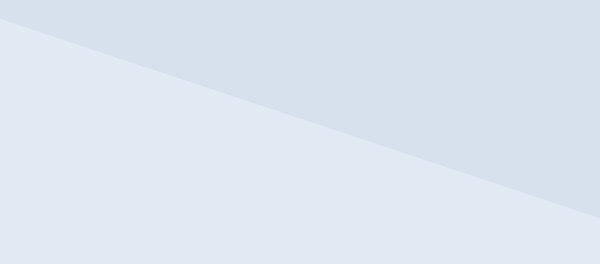
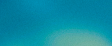
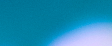
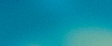
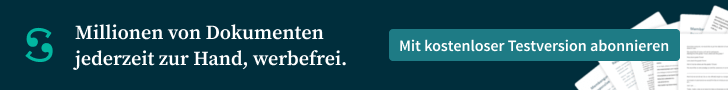
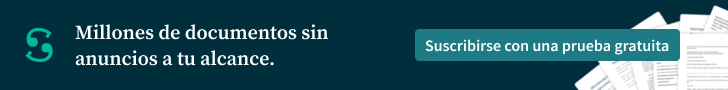
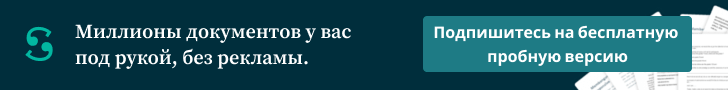
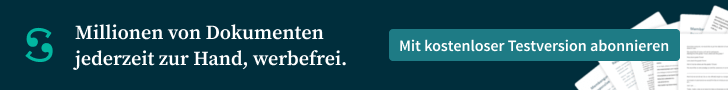
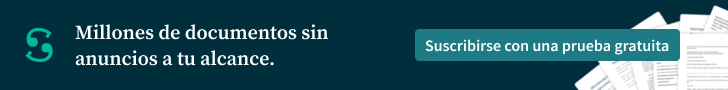
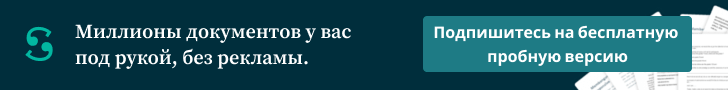
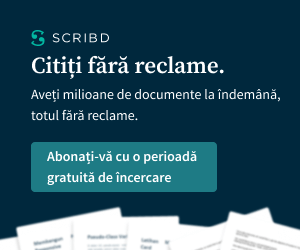
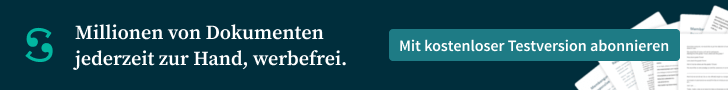
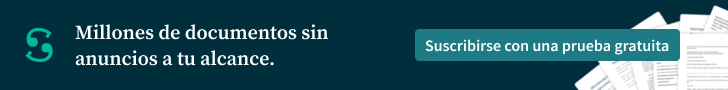
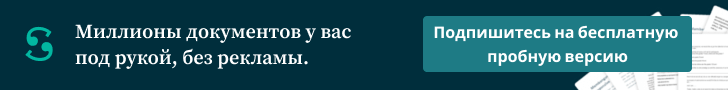
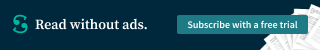
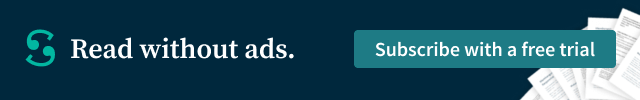
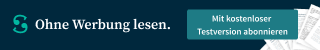
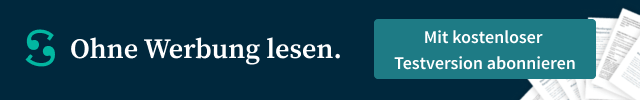
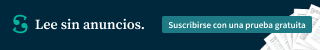
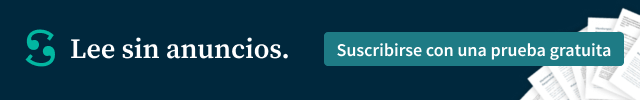
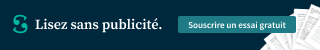
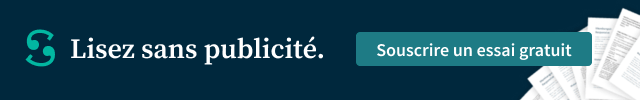
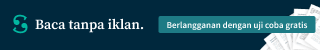
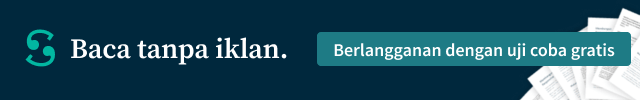
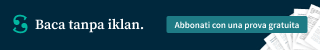
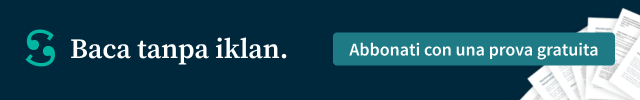
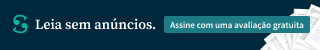
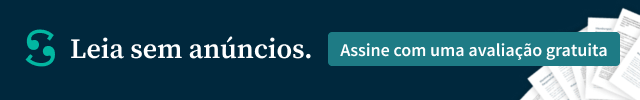
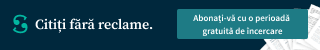
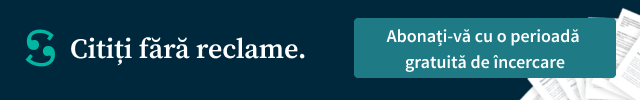
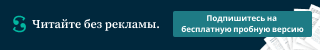
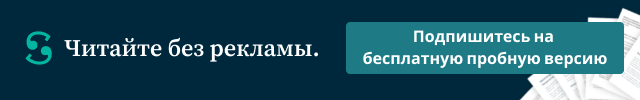
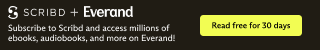
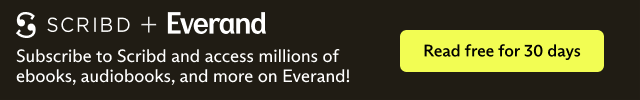
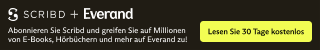
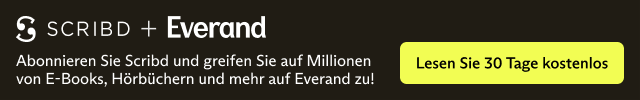
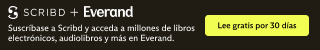
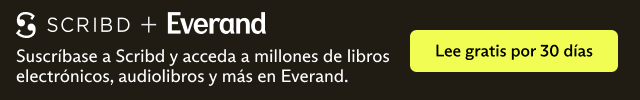
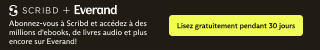
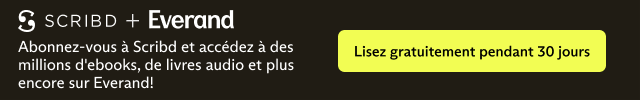
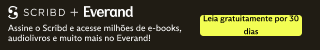
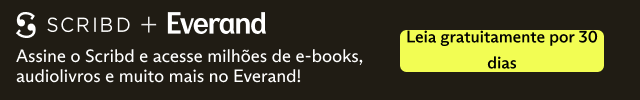
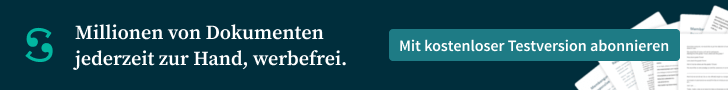
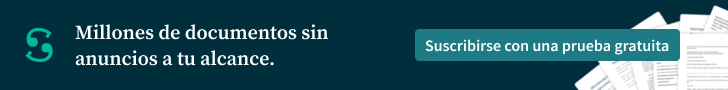
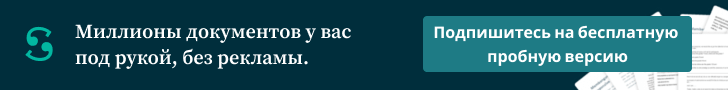
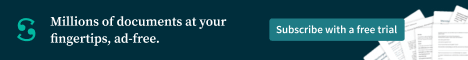
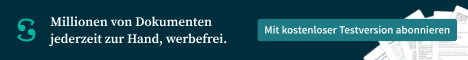
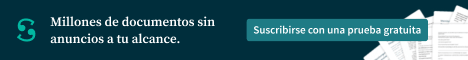
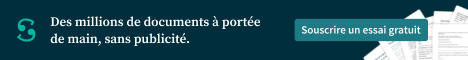
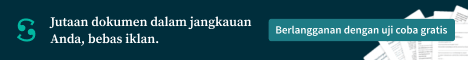
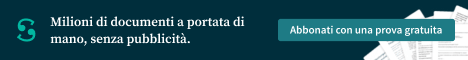
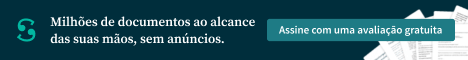
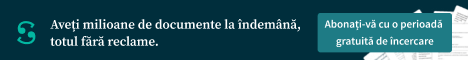
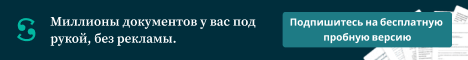
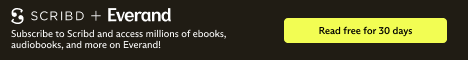
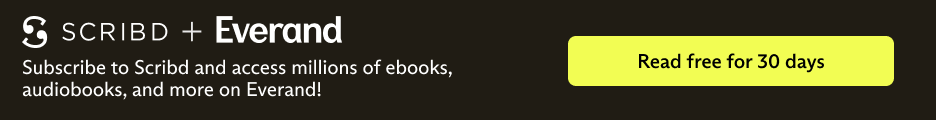
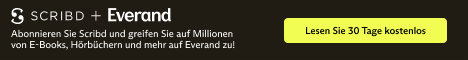
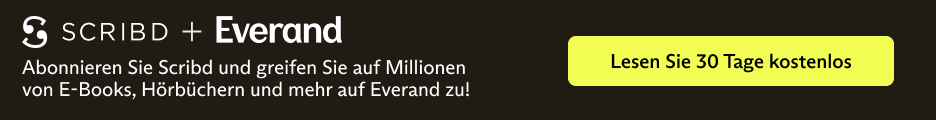
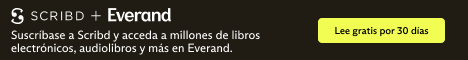
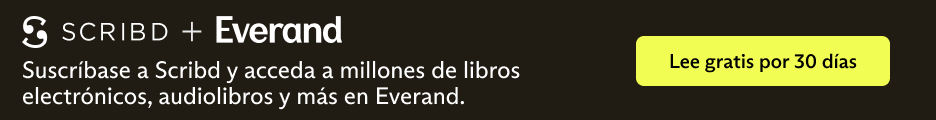
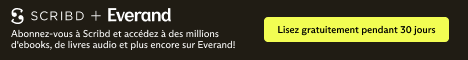
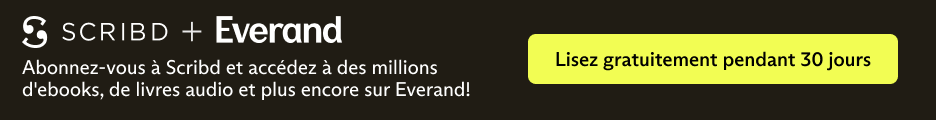
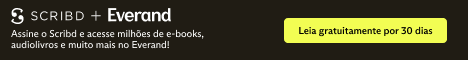
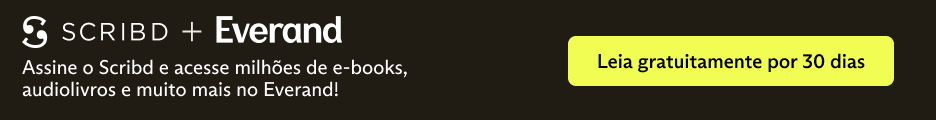
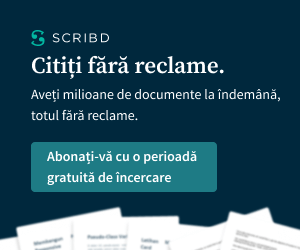
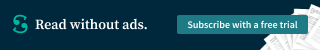
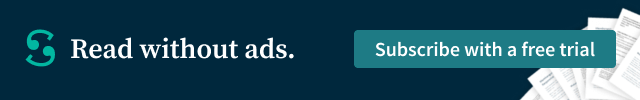
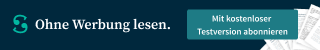
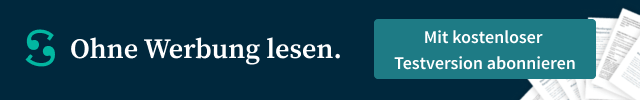
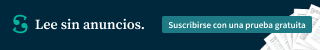
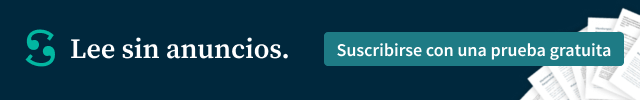
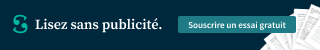
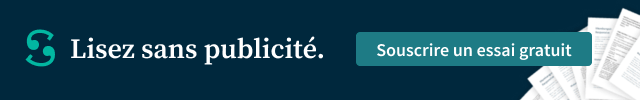
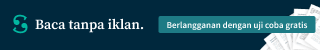
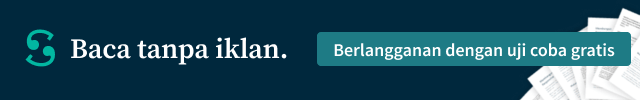
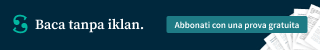
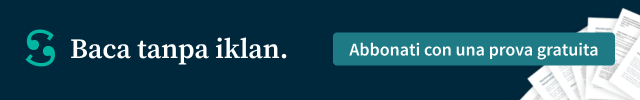
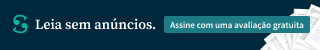
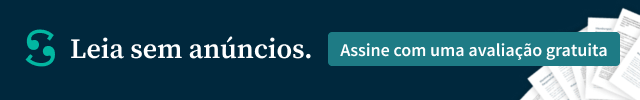
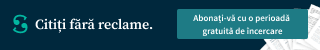
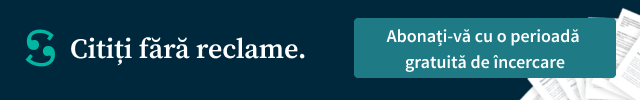
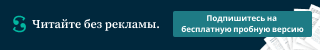
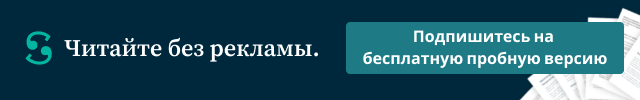
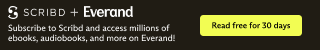
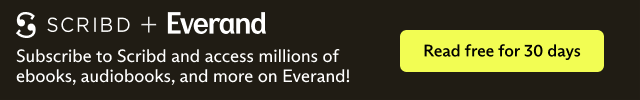
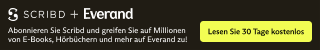
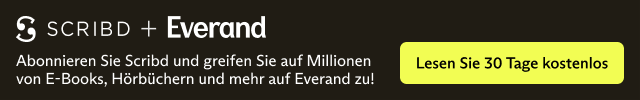
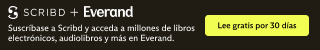
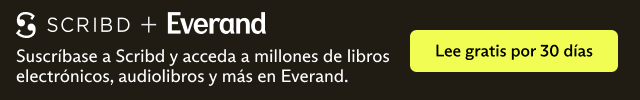
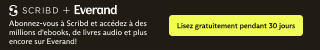
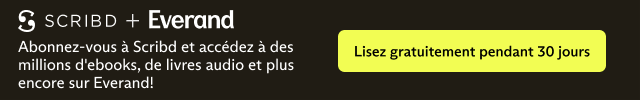
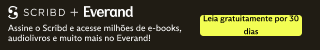
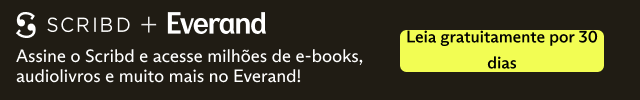
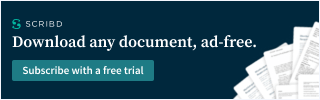
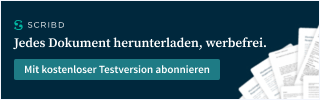
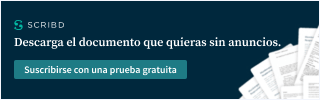
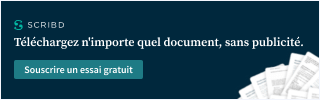
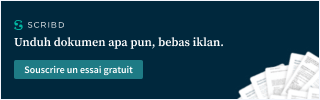
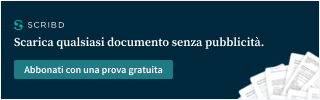
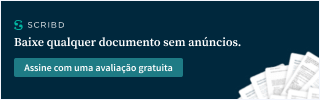
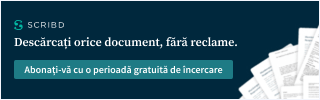
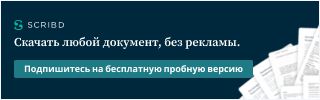
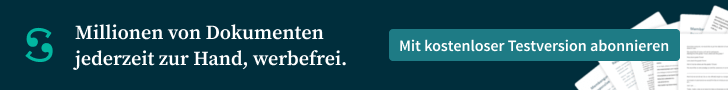
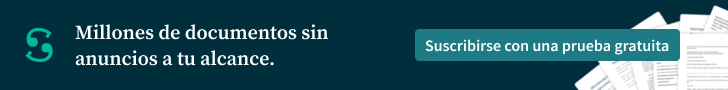
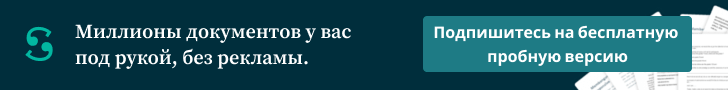
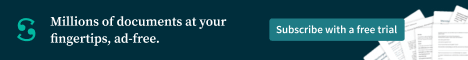
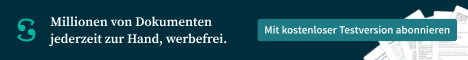
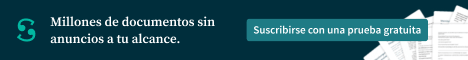
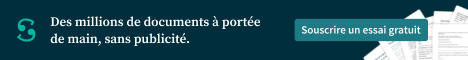
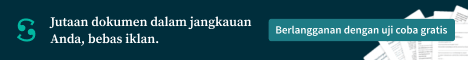
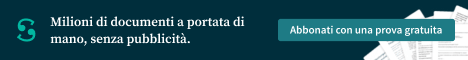
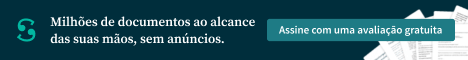
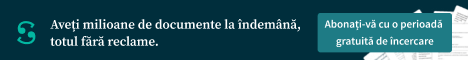
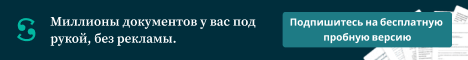
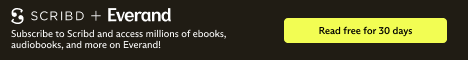
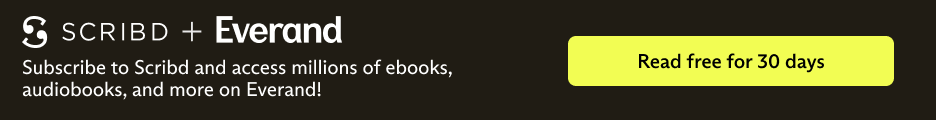
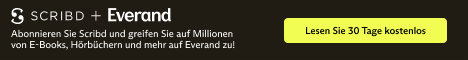
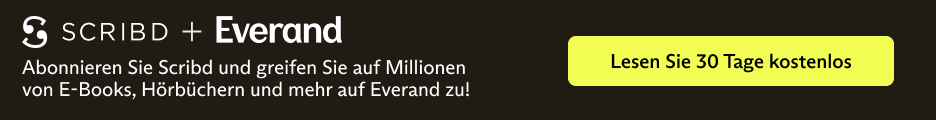
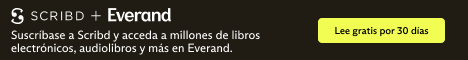
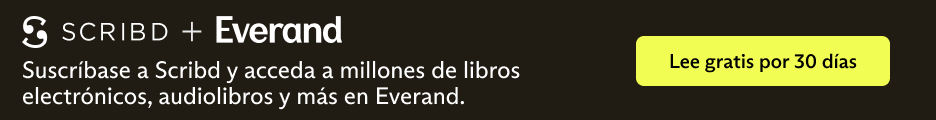
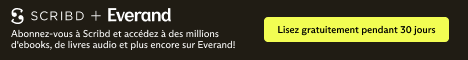
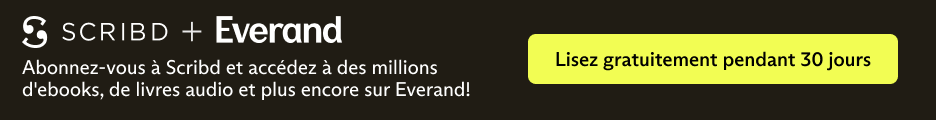
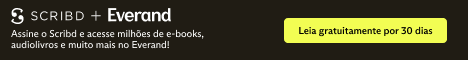
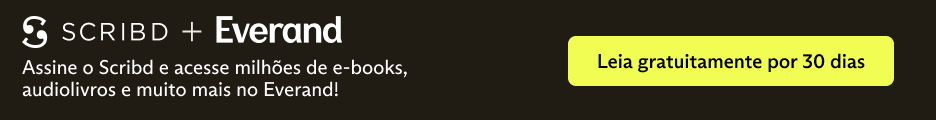
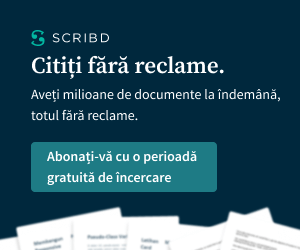
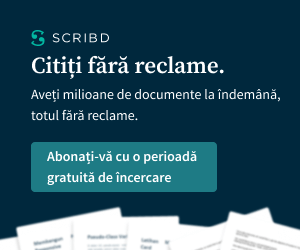
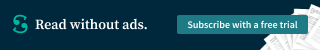
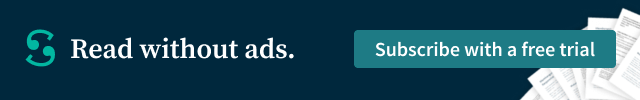
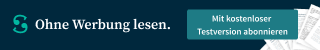
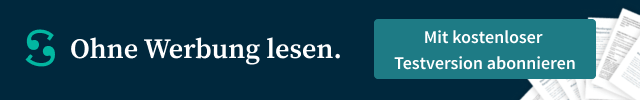
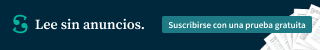
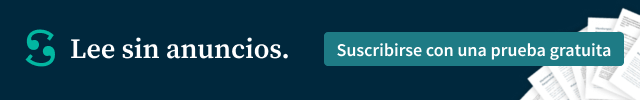
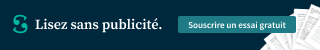
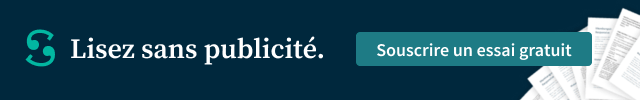
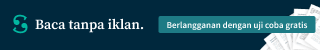
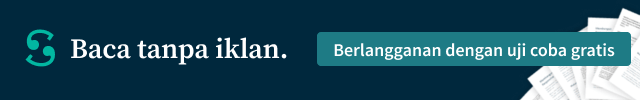
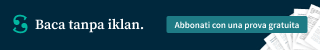
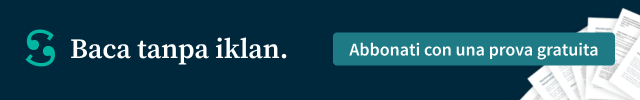
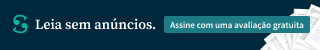
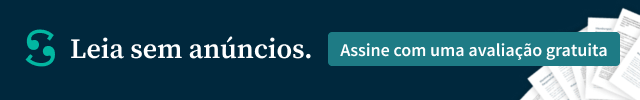
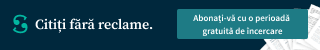
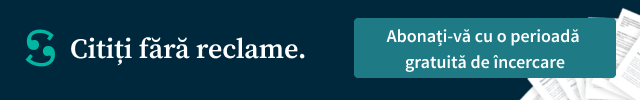
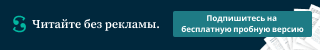
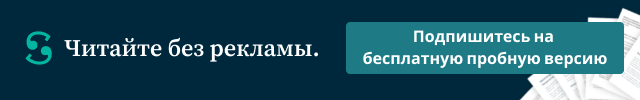
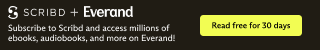
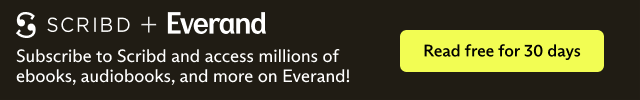
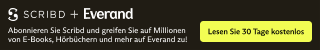
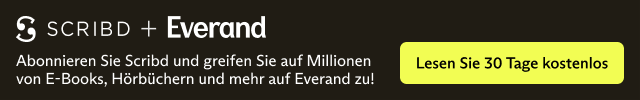
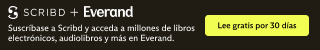
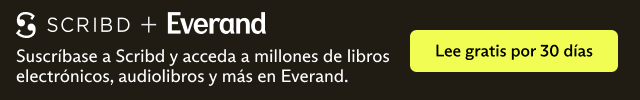
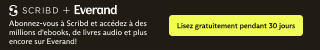
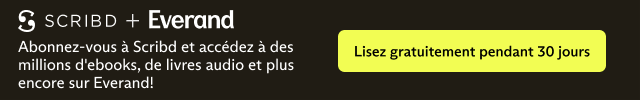
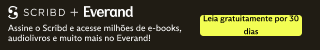
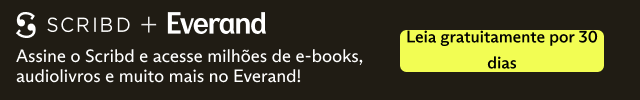
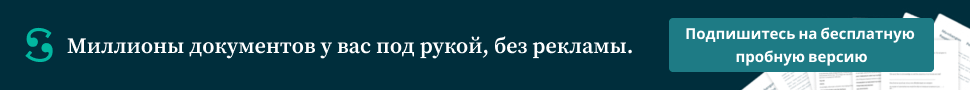
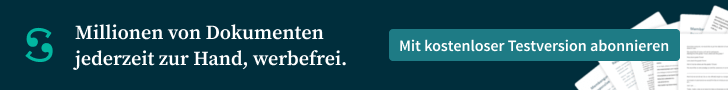
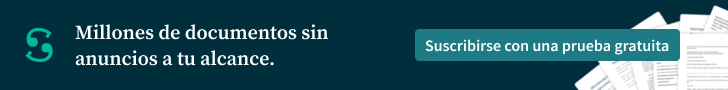
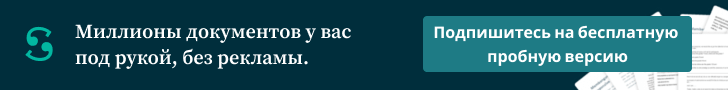
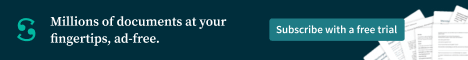
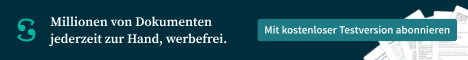
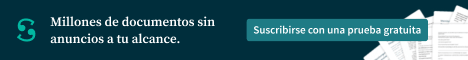
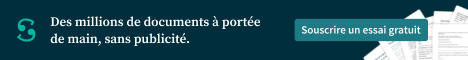
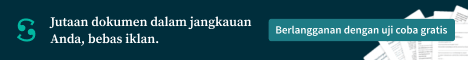
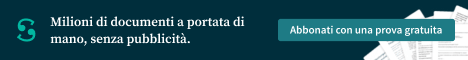
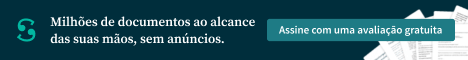
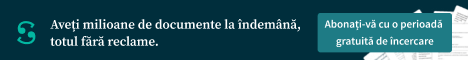
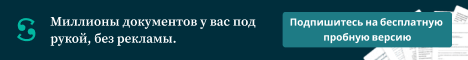
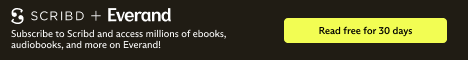
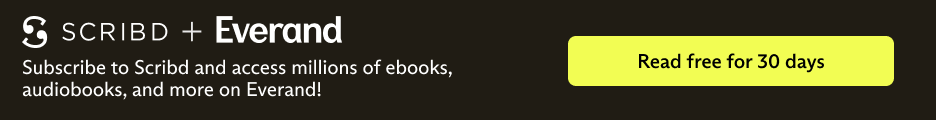
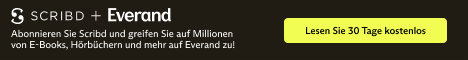
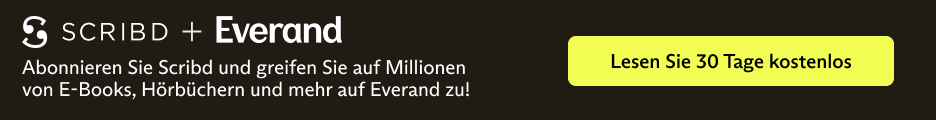
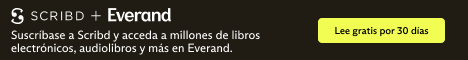
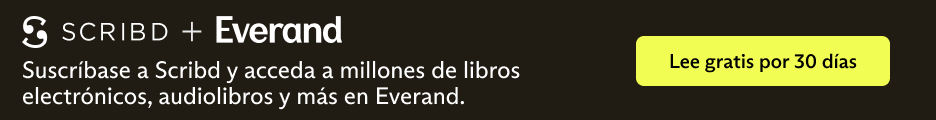
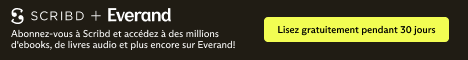
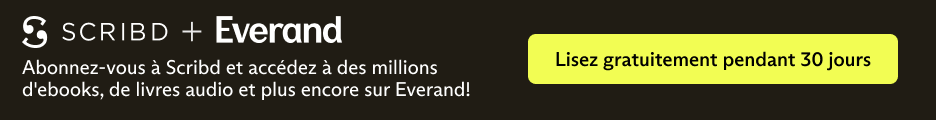
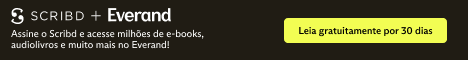
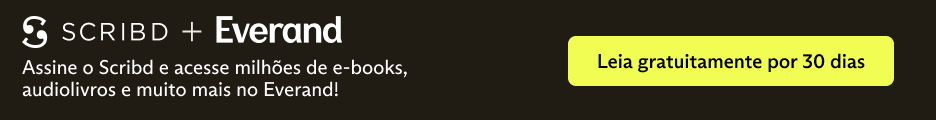
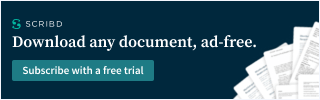
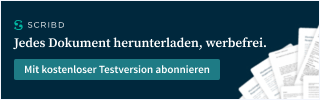
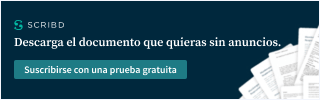
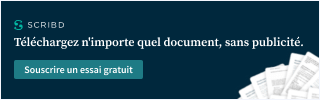
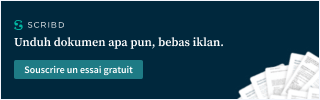
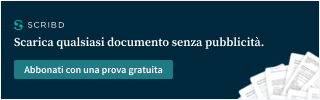
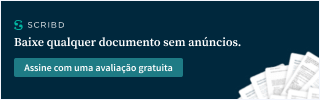
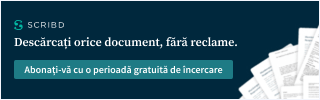
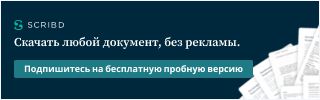
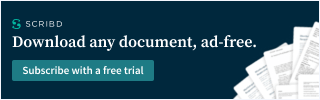
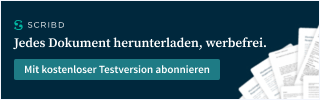
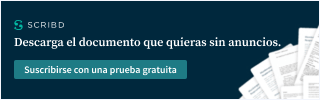
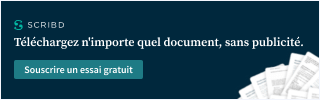
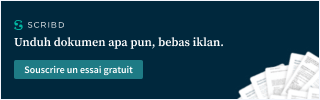
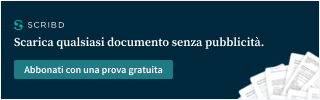
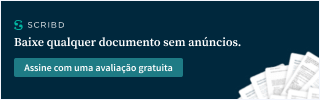
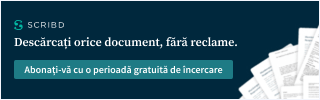
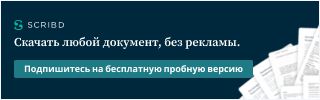

In [ ]:
import requests
from bs4 import BeautifulSoup

def buscar_informacion(consulta):
  """
  Busca información en Google y extrae el texto de los resultados relevantes.

  Args:
      consulta (str): La consulta de búsqueda.

  Returns:
      str: El texto extraído de los resultados de búsqueda relevantes.
  """
  # Formatear la consulta para usar en la URL
  consulta_formateada = "+".join(consulta.split())
  url = f"https://www.google.com/search?q={consulta_formateada}"

  # Definir un User-Agent para emular un navegador web
  headers = {
      "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/91.0.4472.124 Safari/537.36"
  }

  # Realizar la solicitud HTTP a la URL
  response = requests.get(url, headers=headers)

  # Verificar si la solicitud fue exitosa
  if response.status_code == 200:
    # Analizar el contenido HTML de la respuesta
    soup = BeautifulSoup(response.content, "html.parser")

    # Extraer texto de los resultados de búsqueda relevantes
    texto_extraido = ""
    for item in soup.find_all("h3"):
      # Verificar que el elemento padre tiene el atributo 'href'
      parent_a = item.find_parent("a")
      if parent_a and 'href' in parent_a.attrs:
        # Obtener la URL del resultado de búsqueda
        resultado_url = parent_a["href"]

        # Extraer texto de la página web del resultado
        texto_pagina = extraer_texto(resultado_url)

        # Agregar texto extraído a la variable global
        if texto_pagina:
          texto_extraido += f"\n\n**Resultado:** {resultado_url}\n\n{texto_pagina}"

    return texto_extraido
  else:
    print(f"Error al acceder a la URL: {url}")
    return None

def extraer_texto(url):
  """
  Extrae el texto de una página web especificada por la URL.

  Args:
      url (str): La URL de la página web.

  Returns:
      str: El texto extraído de la página web.
  """
  # Realizar solicitud HTTP a la URL
  response = requests.get(url)

  # Verificar si la solicitud fue exitosa
  if response.status_code == 200:
    # Analizar el contenido HTML de la respuesta
    soup = BeautifulSoup(response.content, 'html.parser')

    # Extraer texto de los elementos HTML
    texto_extraido = ''
    for elemento in soup.find_all(text=True):
      # Eliminar espacios en blanco excesivos
      texto_limpio = elemento.strip()

      # Ignorar elementos con solo espacios en blanco
      if texto_limpio:
        texto_extraido += texto_limpio + ' '

    # Eliminar espacios en blanco al inicio y final
    texto_extraido = texto_extraido.strip()

    return texto_extraido
  else:
    print(f"Error al acceder a la URL: {url}")
    return None

# Ejemplo de uso
consulta = "resumenes de investigaciones sobre agentes de inteligencia artificial"
texto_extraido = buscar_informacion(consulta)
print(texto_extraido)
